# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as sc
import seaborn as sns
from pprint import pprint
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 585


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"

    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        response = requests.get(city_url)
        if (response.status_code == 200):
            # Extract data
            city_weather = response.json()

            # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
            city = city_weather.get("name")  
            city_lat = city_weather.get("coord", {}).get("lat")
            city_lng = city_weather.get("coord", {}).get("lon")
            city_max_temp = city_weather.get("main", {}).get("temp_max")
            city_humidity = city_weather.get("main", {}).get("humidity")
            city_clouds = city_weather.get("clouds", {}).get("all")
            city_wind = city_weather.get("wind", {}).get("speed")
            city_country = city_weather.get("sys", {}).get("country")
            city_date = city_weather.get("dt")
    
            # Append the City information into city_data list
            city_data.append({"City": city,
                              "Lat": city_lat,
                              "Lng": city_lng,
                              "Max_Temp": city_max_temp,
                              "Humidity": city_humidity,
                              "Cloudiness": city_clouds,
                              "Wind_Speed": city_wind,
                              "Country": city_country,
                              "Date": city_date})
            
        else:
            print(f"YO! The API threw a non-200 status code: {response['status_code']} for city {city}") # error log
            print()
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ingeniero guillermo n. juarez
Processing Record 2 of Set 1 | hawaiian paradise park
Processing Record 3 of Set 1 | bilibino
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | tsarychanka
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | waitangi
Processing Record 8 of Set 1 | brasileia
Processing Record 9 of Set 1 | invercargill
Processing Record 10 of Set 1 | sinabang
Processing Record 11 of Set 1 | petropavlovsk-kamchatsky
Processing Record 12 of Set 1 | vila velha
Processing Record 13 of Set 1 | villa pigna
Processing Record 14 of Set 1 | qaqortoq
Processing Record 15 of Set 1 | laikit, laikit ii (dimembe)
Processing Record 16 of Set 1 | isafjordur
Processing Record 17 of Set 1 | alma
Processing Record 18 of Set 1 | avarua
Processing Record 19 of Set 1 | anadyr
Processing Record 20 of Set 1 | midvagur
Processing Record 21 of Set 1 | suva
Process

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          559
Lat           559
Lng           559
Max_Temp      559
Humidity      559
Cloudiness    559
Wind_Speed    559
Country       559
Date          559
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
0,Ingeniero Guillermo N. Juárez,-23.9000,-61.8500,70.43,52,100,6.58,AR,1733256751
1,Hawaiian Paradise Park,19.5933,-154.9731,76.51,93,75,1.01,US,1733256752
2,Bilibino,68.0546,166.4372,-7.46,99,96,2.71,RU,1733256754
3,Port-aux-Français,-49.3500,70.2167,42.75,84,94,22.03,TF,1733256755
4,Tsarychanka,48.9370,34.4786,29.28,90,7,6.20,UA,1733256756


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
City_ID,,,,,,,,,
0,Ingeniero Guillermo N. Juárez,-23.9000,-61.8500,70.43,52,100,6.58,AR,1733256751
1,Hawaiian Paradise Park,19.5933,-154.9731,76.51,93,75,1.01,US,1733256752
2,Bilibino,68.0546,166.4372,-7.46,99,96,2.71,RU,1733256754
3,Port-aux-Français,-49.3500,70.2167,42.75,84,94,22.03,TF,1733256755
4,Tsarychanka,48.9370,34.4786,29.28,90,7,6.20,UA,1733256756


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

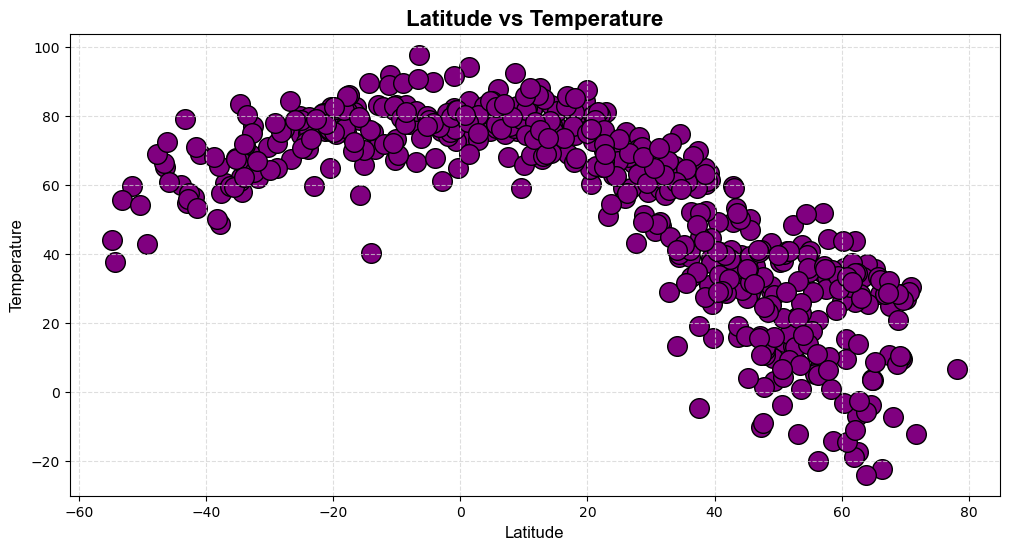

In [8]:
# Build scatter plot for latitude vs. temperature
# make a scatter plot

# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
plt.scatter(city_data_df.Lat, city_data_df.Max_Temp, color="purple", edgecolor="black", s=200)

# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.xlabel("Latitude", fontfamily="Arial", fontsize=12)
plt.ylabel("Temperature", fontfamily="Arial", fontsize=12)
plt.title("Latitude vs Temperature", fontweight="bold", fontsize=16, fontfamily="Arial")

# Add in a background grid
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

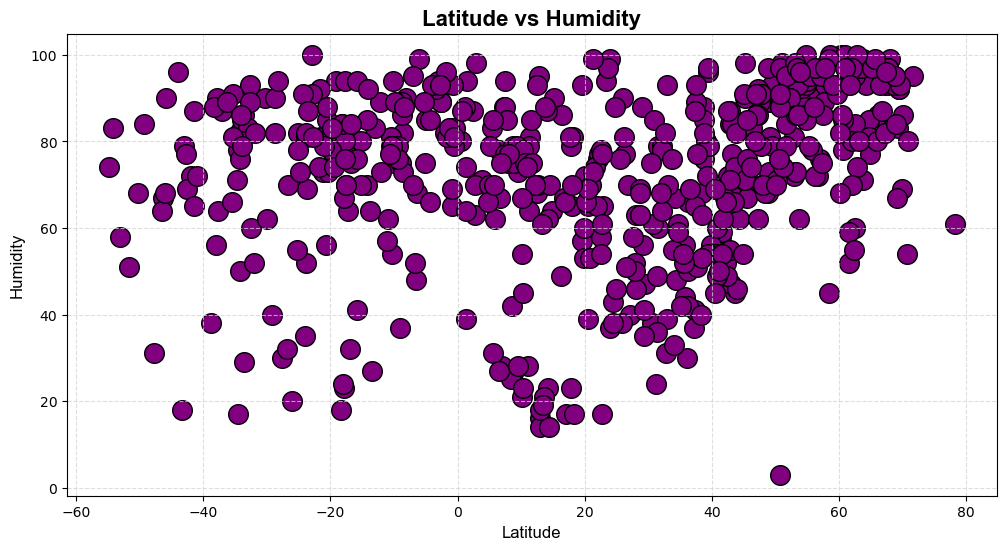

In [9]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
plt.scatter(city_data_df.Lat, city_data_df.Humidity, color="purple", edgecolor="black", s=200)

# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.xlabel("Latitude", fontfamily="Arial", fontsize=12)
plt.ylabel("Humidity", fontfamily="Arial", fontsize=12)
plt.title("Latitude vs Humidity", fontweight="bold", fontsize=16, fontfamily="Arial")

# Add in a background grid
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

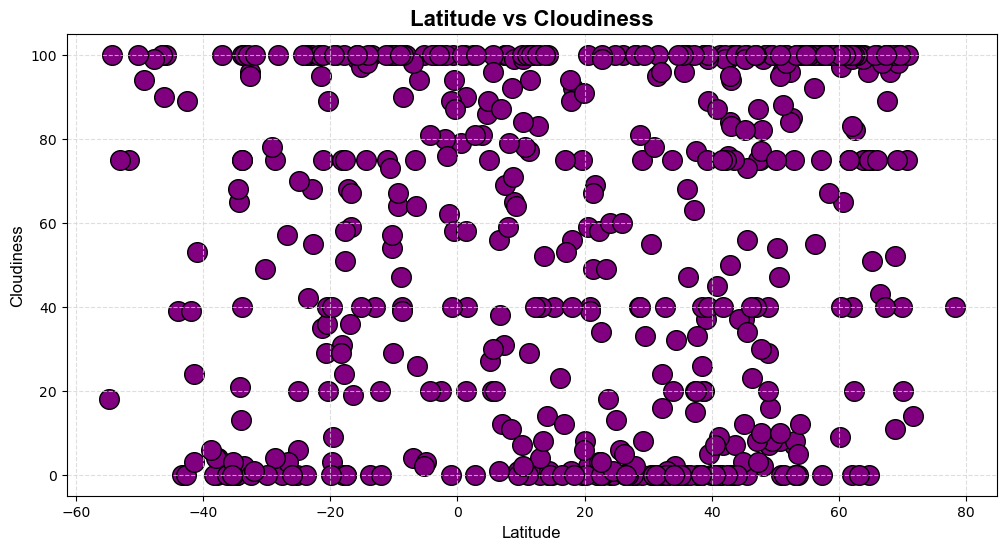

In [10]:
# Build the scatter plots for latitude vs. cloudiness
# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
plt.scatter(city_data_df.Lat, city_data_df.Cloudiness, color="purple", edgecolor="black", s=200)

# Incorporate the other graph properties
plt.xlabel("Latitude", fontfamily="Arial", fontsize=12)
plt.ylabel("Cloudiness", fontfamily="Arial", fontsize=12)
plt.title("Latitude vs Cloudiness", fontweight="bold", fontsize=16, fontfamily="Arial")

# Add in a background grid
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

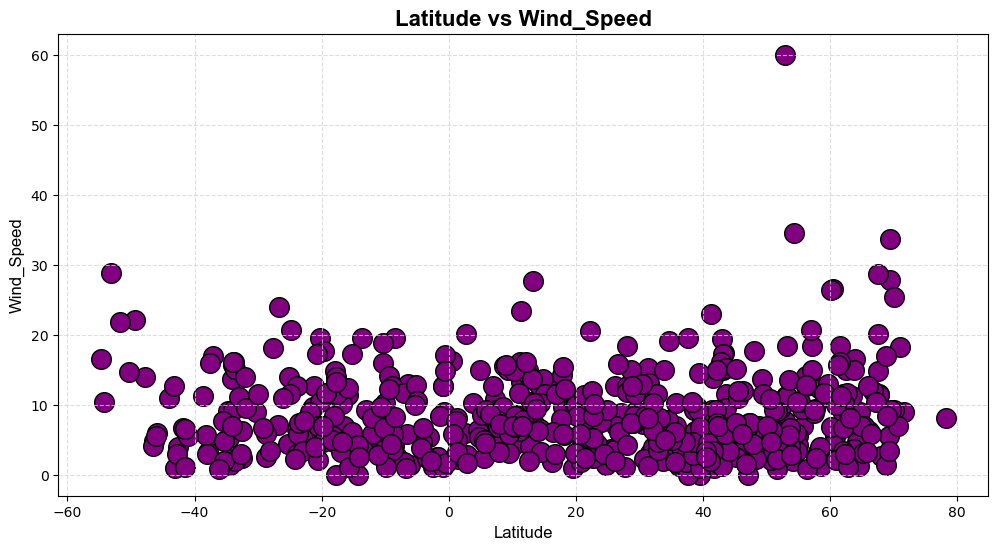

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(12, 6))

# Create a basic plot
plt.scatter(city_data_df.Lat, city_data_df.Wind_Speed, color="purple", edgecolor="black", s=200)

# Incorporate the other graph properties
# Incorporate the other graph properties
plt.xlabel("Latitude", fontfamily="Arial", fontsize=12)
plt.ylabel("Wind_Speed", fontfamily="Arial", fontsize=12)
plt.title("Latitude vs Wind_Speed", fontweight="bold", fontsize=16, fontfamily="Arial")

# Add in a background grid
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [37]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

def linear_regression_plot(x_values, y_values, x_label, y_label, title, annotate):
    # do regression
    (slope, intercept, rvalue, pvalue, stderr) = sc.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept # these are the points/predictions
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    print(line_eq)
    print(rvalue)

    # Figure Size
    plt.figure(figsize=(12, 6))
    
    # Create a basic plot
    plt.scatter(x_values, y_values, color="purple", edgecolor="black", s=200, alpha=0.7)
    plt.plot(x_values, regress_values, color="black", linewidth=2, label="Regression Line") # the regression line
    
    # Add in reference lines
    # Add Labels/Title
    plt.xlabel(x_label, fontfamily="Arial", fontsize=12)
    plt.ylabel(y_label, fontfamily="Arial", fontsize=12)
    plt.title(f"{x_label} vs. {y_label}", fontweight="bold", fontsize=16, fontfamily="Arial")
    
    # Add in a background grid
    plt.grid(linestyle="--", color="pink", alpha=0.75)
    
    # Annotate
    plt.annotate(line_eq, annotate, fontsize=15, color="black")

    # Add Legend
    plt.legend()
    
    # Show/Save the Graph
    plt.show()

In [38]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

northern_hemi_df = city_data_df.loc[city_data_df.Lat >= 0].reset_index(drop=True)

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
0,Hawaiian Paradise Park,19.5933,-154.9731,76.51,93,75,1.01,US,1733256752
1,Bilibino,68.0546,166.4372,-7.46,99,96,2.71,RU,1733256754
2,Tsarychanka,48.9370,34.4786,29.28,90,7,6.20,UA,1733256756
3,Sinabang,2.4803,96.3801,76.59,87,100,5.91,ID,1733256761
4,Petropavlovsk-Kamchatskiy,53.0452,158.6483,19.99,73,0,11.18,RU,1733256763


In [39]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[city_data_df.Lat <= 0].reset_index(drop=True)

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
0,Ingeniero Guillermo N. Juárez,-23.9000,-61.8500,70.43,52,100,6.58,AR,1733256751
1,Port-aux-Français,-49.3500,70.2167,42.75,84,94,22.03,TF,1733256755
2,Ushuaia,-54.8000,-68.3000,43.84,74,18,16.58,AR,1733256478
3,Waitangi,-43.9535,-176.5597,59.83,96,39,11.01,NZ,1733256758
4,Brasiléia,-11.0161,-68.7481,91.85,62,75,3.44,BR,1733256759


###  Temperature vs. Latitude Linear Regression Plot

In [40]:
print(len(northern_hemi_df['Lat']))
print(len(regress_values))

392
559


y = -1.19x + 90.61
-0.851592887558485


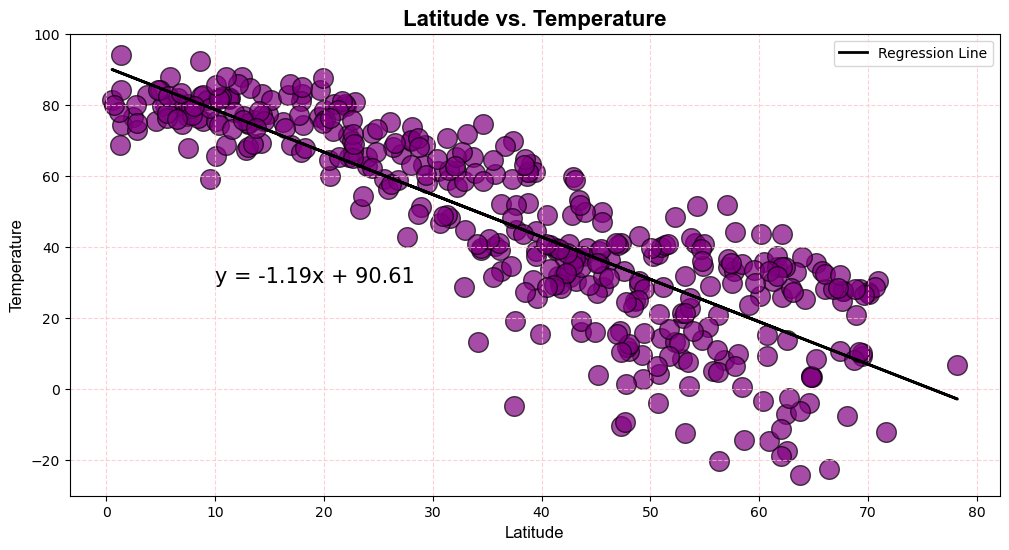

In [41]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max_Temp']
x_label = "Latitude"
y_label = "Temperature"
title = "Latitude vs Temperature of Northern Hemisphere"
annotate = (10,30)

linear_regression_plot(x_values, y_values, x_label, y_label, title, annotate)

y = 0.48x + 83.46
0.6367357527025443


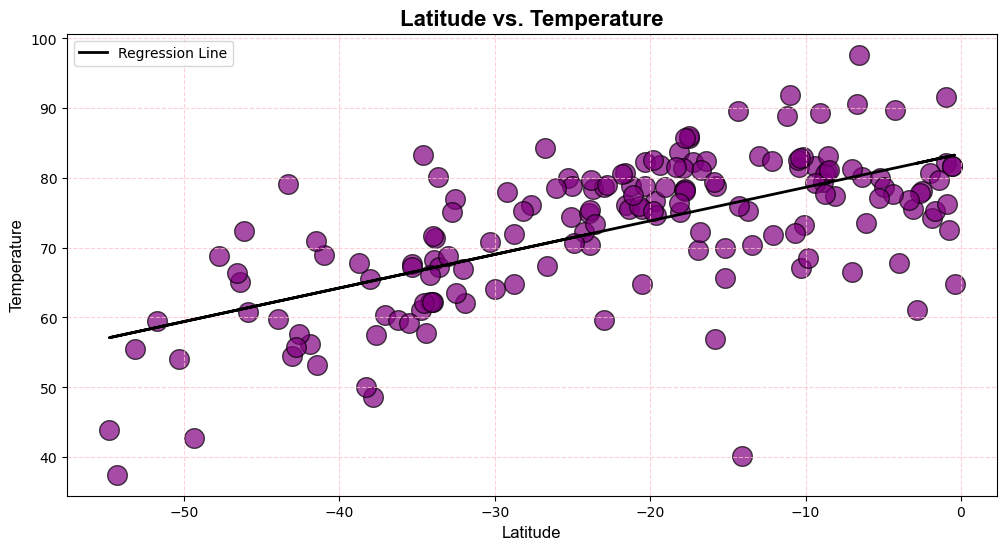

In [42]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max_Temp']
x_label = "Latitude"
y_label = "Temperature"
title = "Latitude vs Temperature in the Southern Hemisphere
annotate = (10,30)

linear_regression_plot(x_values, y_values, x_label, y_label, title, annotate)

**Discussion about the linear relationship:** Observing both graphs showcases that cities closer to the latitude of 0 has a higher temperature. The further away they are the colder the temperature is. However it seems that some cities in the Northern Hemisphere still have a max temperature that remain within colder temperatures. In general the Latitude of a city has a large impact on the overall Temperatue of a city. 

### Humidity vs. Latitude Linear Regression Plot

y = 0.43x + 55.3
0.4054441897664411


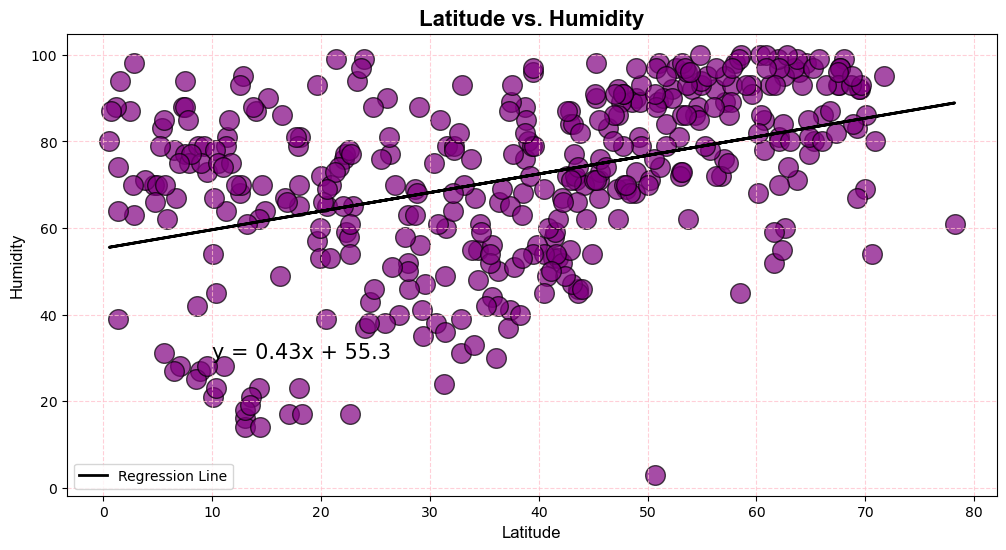

In [44]:
# Northern Hemisphere
# YOUR CODE HERE

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
x_label = "Latitude"
y_label = "Humidity"
title = "Latitude vs Humidity of Northern Hemisphere"
annotate = (10,30)

linear_regression_plot(x_values, y_values, x_label, y_label, title, annotate)

y = 0.25x + 78.8
0.1824415817661284


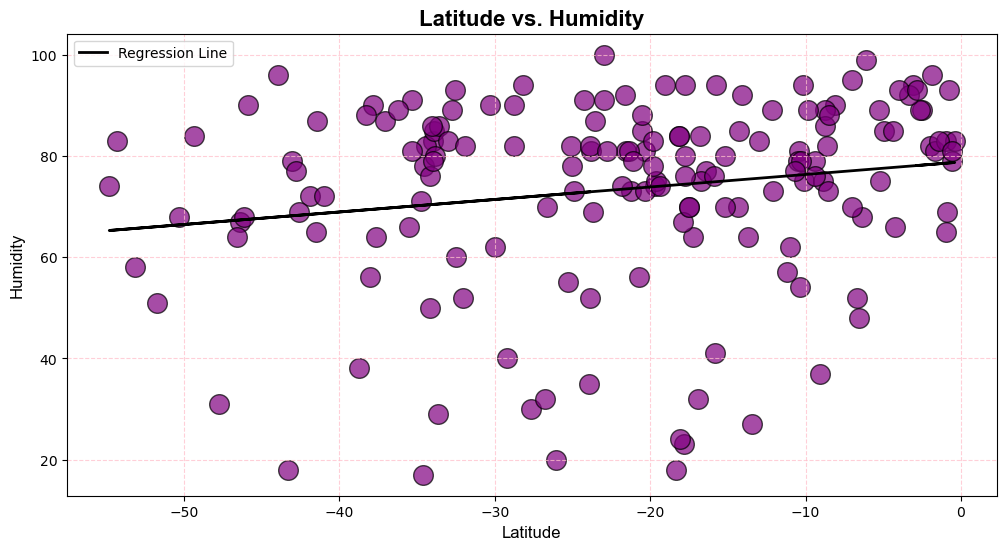

In [45]:
# Southern Hemisphere
# YOUR CODE HERE

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df["Humidity"]
x_label = "Latitude"
y_label = "Humidity"
title = "Latitude vs Humidity in the Southern Hemisphere"
annotate = (10,30)

linear_regression_plot(x_values, y_values, x_label, y_label, title, annotate)

**Discussion about the linear relationship:** Although both graphs have a positive line of best fit it is clear that Latitude does not have a huge effect on the Humidity of a city due to overall placement of the various dots. 

### Cloudiness vs. Latitude Linear Regression Plot

y = 0.47x + 37.42
0.22533386904239341


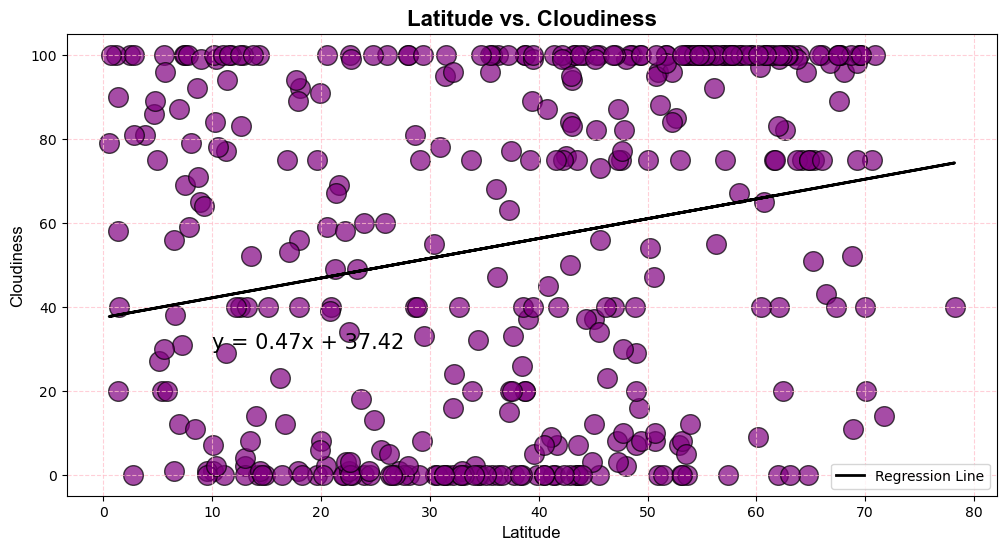

In [46]:
# Northern Hemisphere
# YOUR CODE HERE

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
x_label = "Latitude"
y_label = "Cloudiness"
title = "Latitude vs Cloudiness of Northern Hemisphere"
annotate = (10,30)

linear_regression_plot(x_values, y_values, x_label, y_label, title, annotate)

y = 0.52x + 67.94
0.18428542790519548


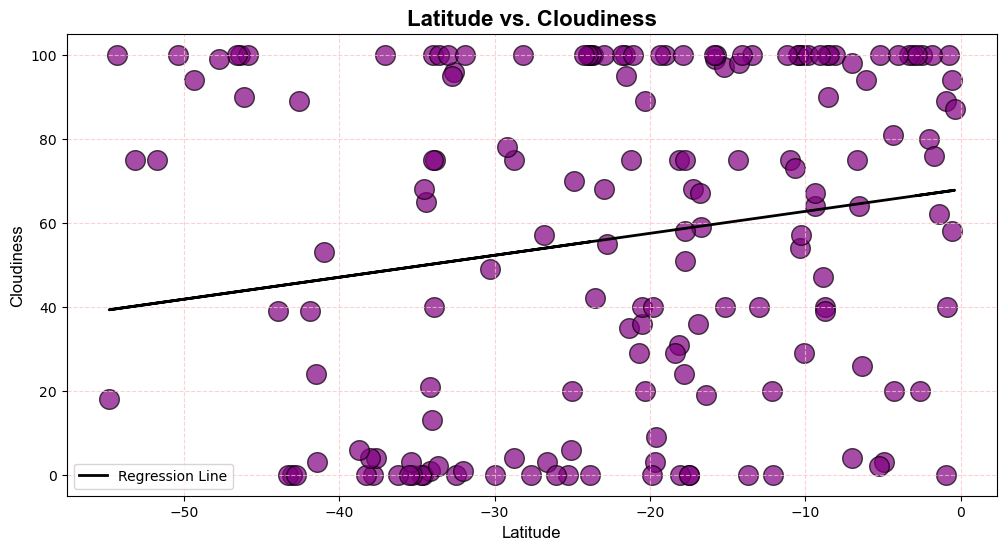

In [47]:
# Southern Hemisphere
# YOUR CODE HERE

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df["Cloudiness"]
x_label = "Latitude"
y_label = "Cloudiness"
title = "Latitude vs Cloudiness in the Southern Hemisphere"
annotate = (10,30)

linear_regression_plot(x_values, y_values, x_label, y_label, title, annotate)

**Discussion about the linear relationship:** Both graphs have a positive slope, however, it does not seem that Latitude has an effect on the Cloudiness of a city. Cloudiness and Latitude has an even less correlation that Latitude and Humidity does. Other environmental factors may play a larger role in determining the Cloudiness of a city. 

### Wind Speed vs. Latitude Linear Regression Plot

y = 0.03x + 7.26
0.08983660894080239


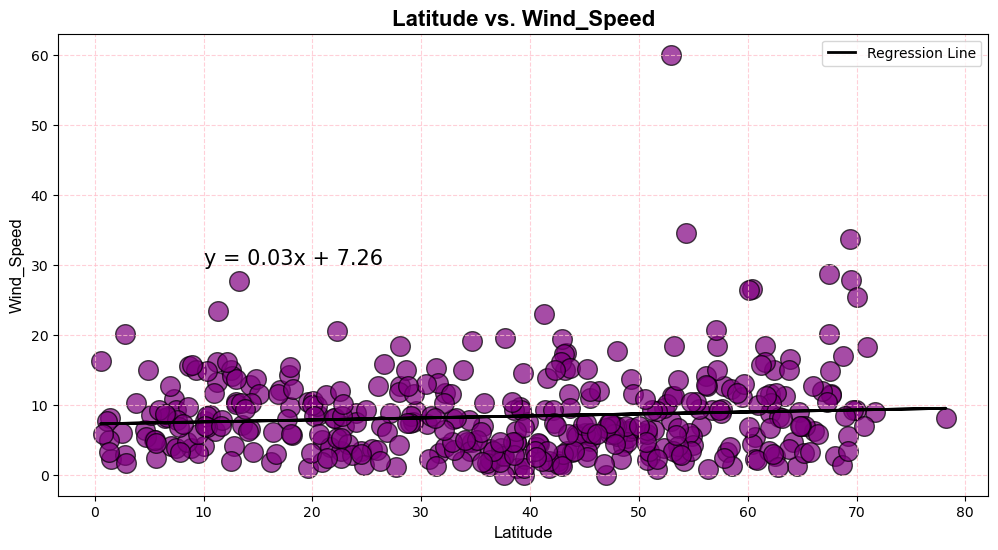

In [48]:
# Northern Hemisphere
# YOUR CODE HERE

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind_Speed']
x_label = "Latitude"
y_label = "Wind_Speed"
title = "Latitude vs Wind_Speed of Northern Hemisphere"
annotate = (10,30)

linear_regression_plot(x_values, y_values, x_label, y_label, title, annotate)

y = -0.07x + 6.77
-0.1736317916152165


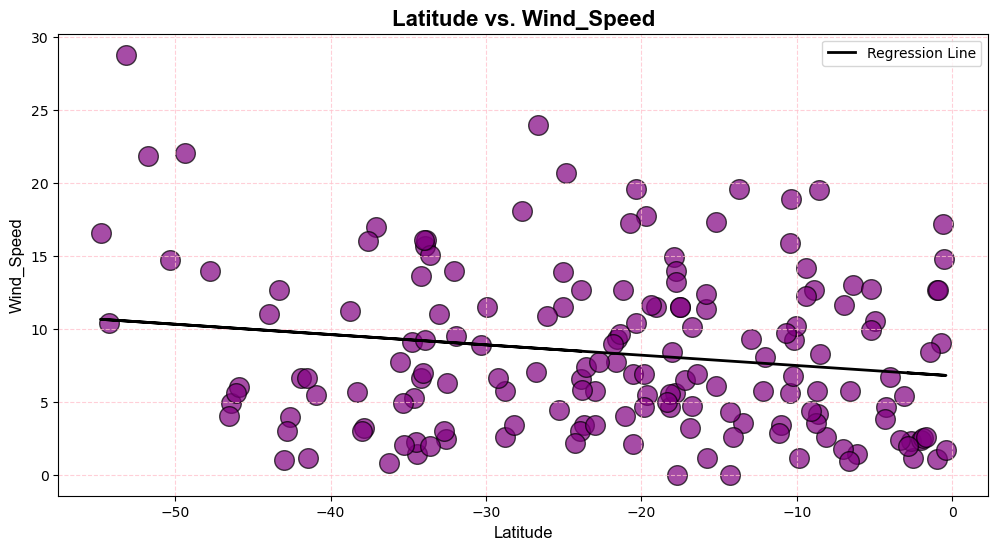

In [49]:
# Southern Hemisphere
# YOUR CODE HERE

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df["Wind_Speed"]
x_label = "Latitude"
y_label = "Wind_Speed"
title = "Latitude vs Wind_Speed in the Southern Hemisphere"
annotate = (10,30)

linear_regression_plot(x_values, y_values, x_label, y_label, title, annotate)

**Discussion about the linear relationship:** It seems that in the Northern Hemisphere there might be less of a correlation of Wind Speed and Latitude than it does in the Southern Hemisphere. In the Northern Hemisphere it seems that the latitude does not effect the strength of Wind Speed while the Southern Hemisphere has somewhat of a stronger effect. 